# 一、KNN

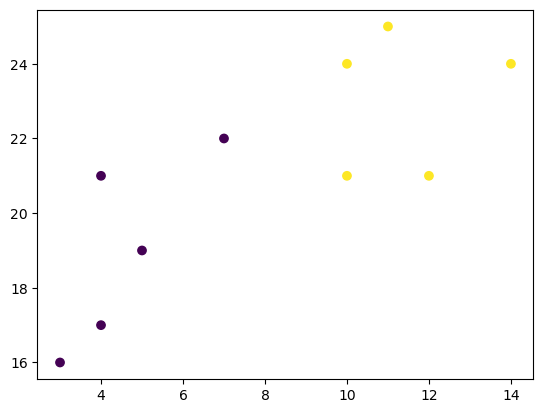

In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import sys

import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 7, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

#Two  lines to make our compiler able to draw:

sys.stdout.flush()


D:\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


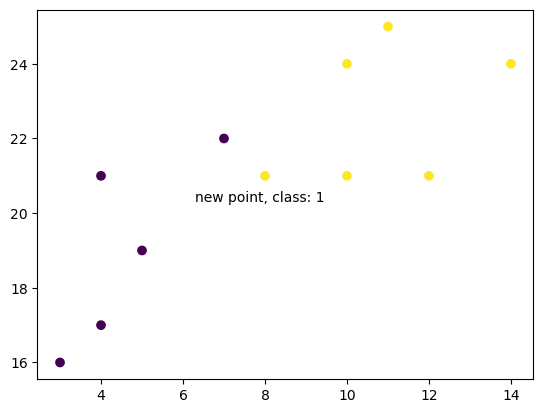

In [2]:
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)

new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

# 二、SVM

### https://pyecontech.com/2020/04/11/python_svm/

In [17]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()
X=iris.data
y=iris.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [19]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='poly')

In [20]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [21]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.9777777777777777


#### 範例

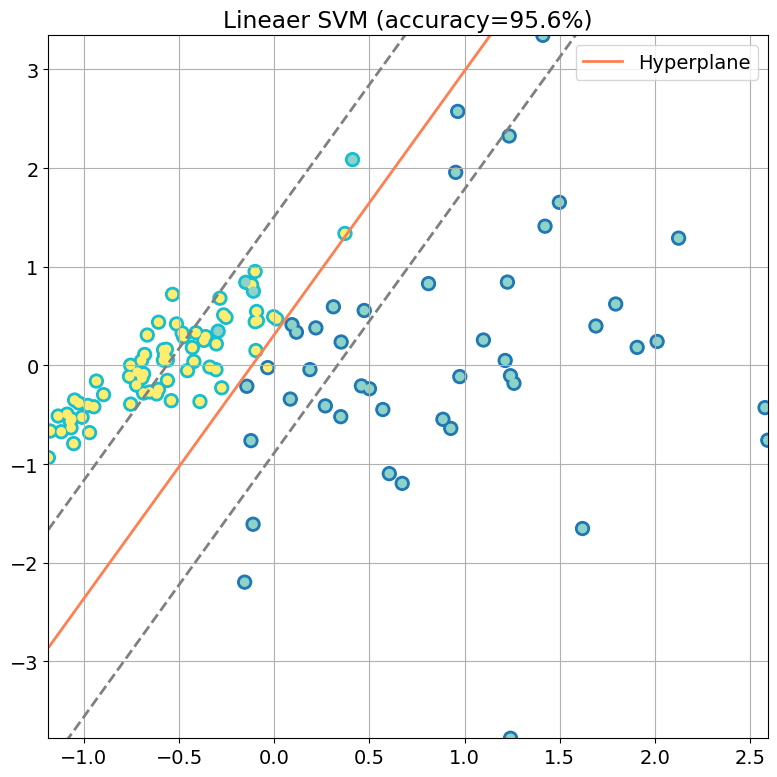

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
dx = load_breast_cancer().data
dy = load_breast_cancer().target
dx = PCA(n_components=2).fit_transform(dx)
dx = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = \
          train_test_split(dx, dy, test_size=0.2, random_state=0)
# 訓練線性 SVM 並預測結果
model = LinearSVC()
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'Lineaer SVM (accuracy={test_score:.1f}%)')
plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)
# 求出超平面
a = -model.coef_[0][0] / model.coef_[0][1]
x = np.linspace(np.amin(dx_test.T[0]), np.amax(dx_test.T[0]))
y = a * x - model.intercept_[0] / model.coef_[0][1]
# 求出邊界
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
y_down = y - np.sqrt(1 + a ** 2) * margin
y_up = y + np.sqrt(1 + a ** 2) * margin
# 畫出超平面與邊界
plt.plot(x, y, color='coral', linewidth=2, label='Hyperplane')
plt.plot(x, y_down, color='grey', linewidth=2, linestyle='--')
plt.plot(x, y_up, color='grey', linewidth=2, linestyle='--')
plt.legend()
plt.grid(True)
plt.xlim([np.amin(dx_test.T[0]), np.amax(dx_test.T[0])])
plt.ylim([np.amin(dx_test.T[1]), np.amax(dx_test.T[1])])
plt.tight_layout()
plt.show()

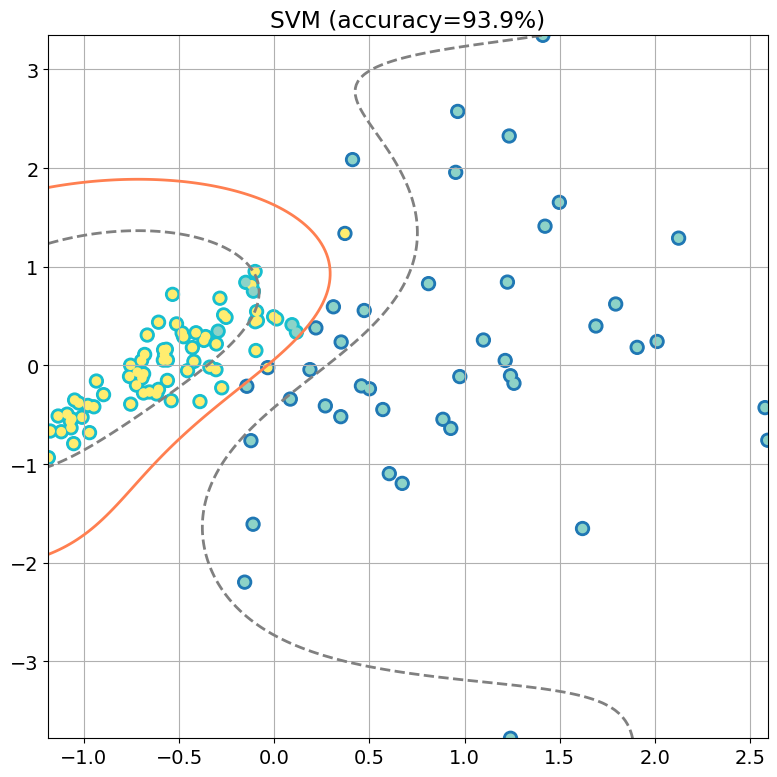

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
dx = load_breast_cancer().data
dy = load_breast_cancer().target
dx = PCA(n_components=2).fit_transform(dx)
dx = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = \
          train_test_split(dx, dy, test_size=0.2, random_state=0)
# 訓練線性 SVM 並預測結果
kernel = 'rbf'  # 選擇 kernel: 'linear', 'poly', 'rbf', 'sigmoid'
model = SVC(kernel=kernel)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'SVM (accuracy={test_score:.1f}%)')
plt.scatter(*dx_test.T, c=predict, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)
# 求出超平面與邊界
x_min = np.amin(dx_test.T[0])
x_max = np.amax(dx_test.T[0])
y_min = np.amin(dx_test.T[1])
y_max = np.amax(dx_test.T[1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.decision_function(
    np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
# 畫出超平面與邊界
plt.contour(XX, YY, Z, colors=['grey', 'coral', 'grey'],
            linestyles=['--', '-', '--'], linewidths=[2, 2, 2],
            levels=[-1, 0, 1])
plt.grid(True)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.tight_layout()
plt.show()

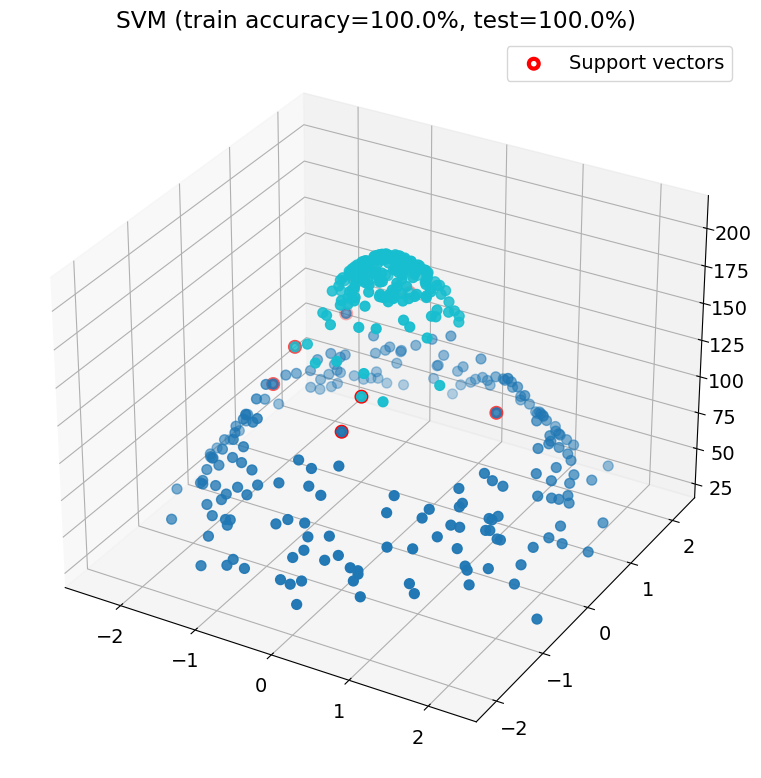

In [27]:
# 匯入套件
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import RBF
dx, dy = make_circles(n_samples=500, noise=0.15, factor=0.15,
                      random_state=0)
dx = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = \
    train_test_split(dx, dy, test_size=0.2, random_state=0)
# 用 RBF 函數換算 Z 軸
rbf = RBF()
r = rbf(dx_train)
r_sum = r.sum(axis=1)
kernel = 'rbf'
model = SVC(C=1000, gamma=0.1, kernel=kernel)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
train_score = model.score(dx_train, dy_train) * 100
test_score = model.score(dx_test, dy_test) * 100
fig = plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
# 繪製三維散佈圖
ax = fig.add_subplot(111, projection='3d')
plt.title(f'SVM (train accuracy={train_score:.1f}%, ' + \
          f'test={test_score:.1f}%)')
ax.scatter(*dx_train.T, r_sum, c=dy_train, cmap='tab10', s=50)
ax.scatter(*model.support_vectors_.T, r[model.support_].sum(axis=1),
           color='None', linewidth=3, edgecolor='red',
           s=50, label='Support vectors')
plt.grid(True)
plt.legend()
plt.xlim([np.amin(dx.T[0]), np.amax(dx.T[0])])
plt.ylim([np.amin(dx.T[1]), np.amax(dx.T[1])])
plt.tight_layout()
plt.show()


# 三、Decision Tree

In [16]:
import random
import pandas as pd
from collections import defaultdict
mushrooms = defaultdict(lambda: [])
def checkType(size, length):
    if size < 10: return 'RICH'
    if size < 15: return 'FOU'
    if length > 15:
        return 'RICH'
    return 'MYS'
for i in range(100):
    size = random.randint(1, 20)
    length = random.randint(1, 20)
    mushrooms['type'].append(checkType(size, length))
    mushrooms['size'].append(size)
    mushrooms['length'].append(length)


data = pd.DataFrame.from_dict(mushrooms)

In [17]:
data

,type,size,length
0,RICH,18,20
1,FOU,11,17
2,RICH,20,17
3,RICH,9,19
4,RICH,8,19
...,...,...,...
95,FOU,14,11
96,RICH,5,16
97,RICH,6,16
98,FOU,13,20


In [18]:
y = data['type']                   # 變出 y 資料
X = data.drop(['type'], axis=1)    # 變出 X 資料，將 type 丟棄

#### 分割-8-2

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 學習

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
model.score(X_test, y_test)

1.0

### 視覺化

#### 下載https://graphviz.org/

In [23]:
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                feature_names=['size', 'length'],
                class_names=model.classes_)

graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

# 四、Random Forest

#### 語法

In [24]:
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forest Classifier 模型
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
# 使用訓練資料訓練模型
randomForestModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = randomForestModel.predict(X_train)

# 五、K-Means

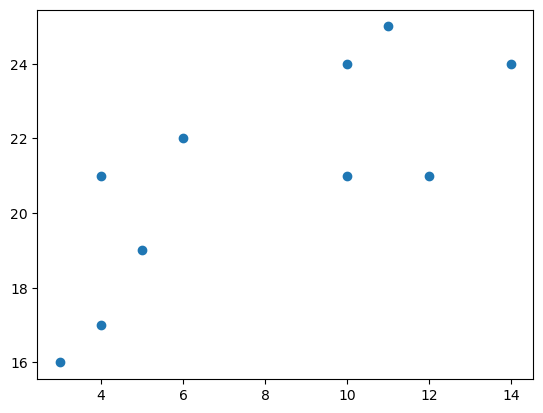

In [32]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

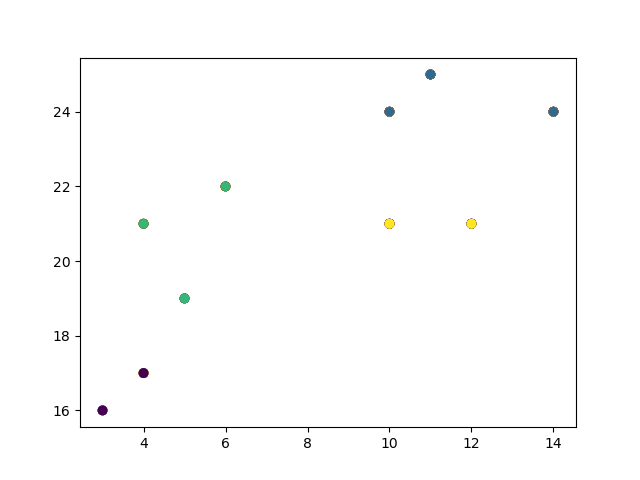

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from io import BytesIO

x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)

# Save the plot to a BytesIO object
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
display(Image(buf.read()))



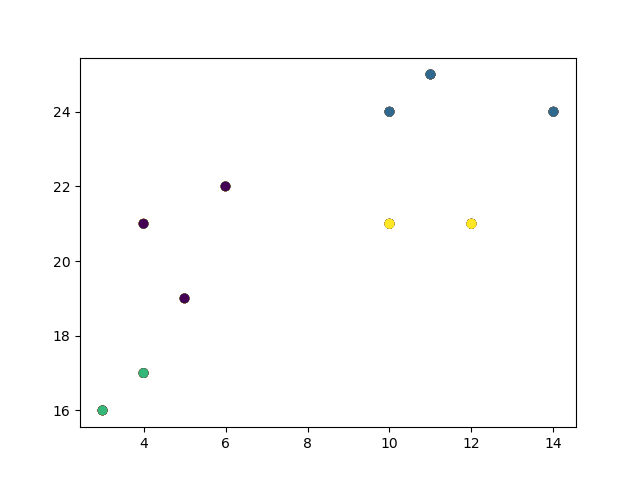

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from io import BytesIO

x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)

# Save the plot to a BytesIO object
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
display(Image(buf.read()))

